### Python for Finance - Portfolio Optimization and Backtesting Project - A.M.M. ICL ICBS ESB '24

###### ** Markdown cells contain subtitles of processes and sequenced steps underlying reasoning, # comments for code elaboration**

#### We begin by importing our prerequisites

In [21]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### The portfolio of stocks chosen contains 5 defence stocks and 5 semiconducter related stocks 
##### [arbitrary stock picks]


### > Downloading tickers and data from yfinance 
### > Creating columns for ticker symbols 
### > Concatenating dataframes 
### > Resetting index to not use date as index
### > Saving data to csv 
### > Display multistock panel

In [22]:
tickers = ["GD", "MSFT", "QCOM", "TSM", "NVDA", "LMT", "BA", "INTC", "NOC", "AMD"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2019-01-01", end="2023-12-31")
    data.insert(0, "Ticker", ticker)
    groups.append(data)

multi_df = pd.concat(groups)

multi_df.reset_index(inplace=True)

print(multi_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            Date Ticker        Open        High         Low       Close  \
0     2019-01-02     GD  155.320007  157.460007  153.820007  157.259995   
1     2019-01-03     GD  156.000000  156.729996  152.440002  153.369995   
2     2019-01-04     GD  155.350006  157.830002  154.119995  157.770004   
3     2019-01-07     GD  157.630005  159.669998  155.929993  158.649994   
4     2019-01-08     GD  159.289993  159.919998  156.750000  158.660004   
...          ...    ...         ...         ...         ...         ...   
12575 2023-12-22    AMD  140.479996  140.699997  138.309998  139.600006   
12576 2023-12-26    AMD  140.070007  143.850006  139.919998  143.410004   
12577 2023-12-27    AMD  144.720001  146.250000  143.179993  146.070007   
12578 2023-12-28    AMD  146.800003  150.410004  145.949997  148.759995   
12579 2023-12-29    AMD  149.500000  151.050003  147.199997  147.410004   

        Adj Close    Volume  
0      136.895645   1276200  
1      133.509399   1436000  
2      13

## Cleaning checks on data 

### > Head
### > Tail
### > Duplicated / Missing

In [23]:
print(multi_df.head())

        Date Ticker        Open        High         Low       Close  \
0 2019-01-02     GD  155.320007  157.460007  153.820007  157.259995   
1 2019-01-03     GD  156.000000  156.729996  152.440002  153.369995   
2 2019-01-04     GD  155.350006  157.830002  154.119995  157.770004   
3 2019-01-07     GD  157.630005  159.669998  155.929993  158.649994   
4 2019-01-08     GD  159.289993  159.919998  156.750000  158.660004   

    Adj Close   Volume  
0  136.895645  1276200  
1  133.509399  1436000  
2  137.339600  1840000  
3  138.105667  1047400  
4  138.114349  1350300  


In [24]:
print(multi_df.tail())

            Date Ticker        Open        High         Low       Close  \
12575 2023-12-22    AMD  140.479996  140.699997  138.309998  139.600006   
12576 2023-12-26    AMD  140.070007  143.850006  139.919998  143.410004   
12577 2023-12-27    AMD  144.720001  146.250000  143.179993  146.070007   
12578 2023-12-28    AMD  146.800003  150.410004  145.949997  148.759995   
12579 2023-12-29    AMD  149.500000  151.050003  147.199997  147.410004   

        Adj Close    Volume  
12575  139.600006  35370400  
12576  143.410004  47157400  
12577  146.070007  49033400  
12578  148.759995  63800700  
12579  147.410004  62028200  


In [25]:
print(multi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12580 non-null  datetime64[ns]
 1   Ticker     12580 non-null  object        
 2   Open       12580 non-null  float64       
 3   High       12580 non-null  float64       
 4   Low        12580 non-null  float64       
 5   Close      12580 non-null  float64       
 6   Adj Close  12580 non-null  float64       
 7   Volume     12580 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 786.4+ KB
None


In [26]:
multi_df.duplicated().sum()

0

In [27]:
multi_df.isna().sum()
#No duplicates or missing values - data appears clean

Date         0
Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
#Optional to save data locally [remove ### to save to preferred path]
### multi_df.to_csv("C:\\Users\\amjmo\\OneDrive\\Desktop\\ICBSPythonData.csv", index=False)


## Creating reusable function for plotting close prices of tickers to iterate across all tickers 

### Display of all tickers and close prices on same axes

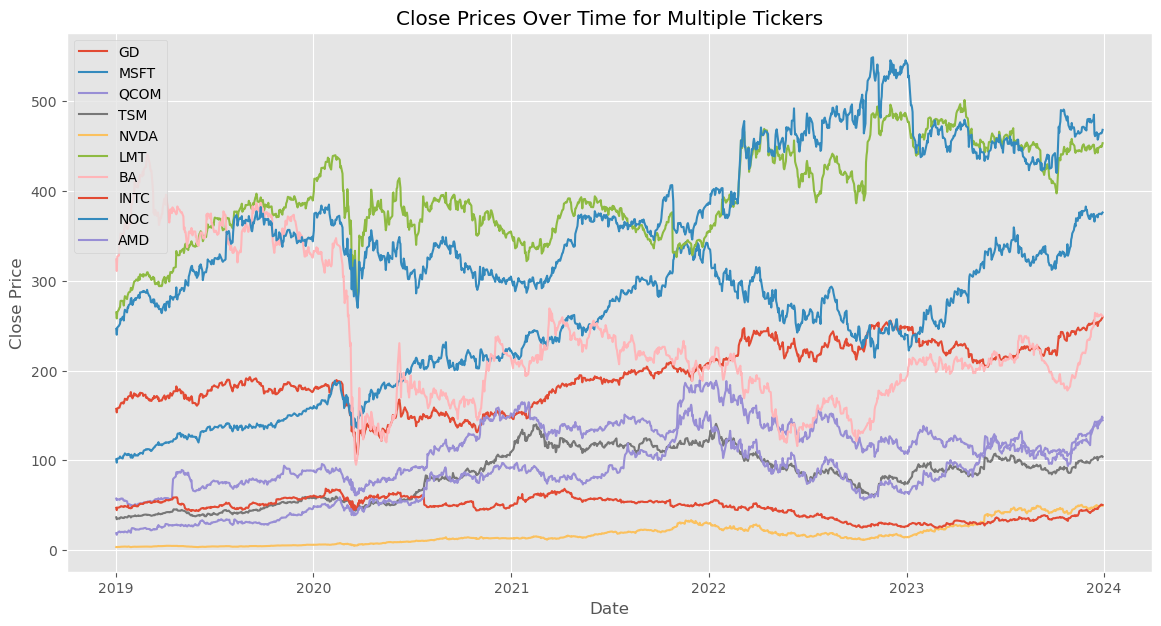

In [29]:
def plot_all_tickers(df, tickers):
    plt.figure(figsize=(14, 7))
    for ticker in tickers:
        ticker_data = df[df["Ticker"] == ticker]
        plt.plot(ticker_data["Date"], ticker_data["Close"], label=ticker)
    plt.title("Close Prices Over Time for Multiple Tickers")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend(loc="best")
    plt.show()
    
plot_all_tickers(multi_df, tickers)

## Creating reusable function for plotting bollinger bands to iterate across all tickers
##### Consisting of a 20 day simple moving average and a 20 day standard deviation constituting bollinger bands 2 standard deviations above and below the SMA mean.
### > Entry signals for entering positions
### > Exit signals for reversion back to mean 
### > Simple daily returns calculation
### > Shift signal to align with returns
### > Strategy daily returns
### > Cumulative market and strategy returns

In [30]:
def bollinger_bands_calc(df):
    df["sma"] = df["Close"].rolling(window=20).mean()
    df["stdev"] = df["Close"].rolling(window=20).std()
    df["BBlowband"] = df["sma"] - (2 * df["stdev"])
    df["BBhighband"] = df["sma"] + (2 * df["stdev"])

    #Empty column created for signals
    df["signal"] = np.NaN

    #Entry signals
    df.loc[df["Close"] < df["BBlowband"], "signal"] = 1 
    df.loc[df["Close"] > df["BBhighband"], "signal"] = -1
    
    #Exit signals 
    df.loc[(df["Close"] < df["sma"]) & (df["signal"].shift(1) == 1), "signal"] = 0
    df.loc[(df["Close"] > df["sma"]) & (df["signal"].shift(1) == -1), "signal"] = 0

    #Forward filling of signal entries to "maintain" position until signal change, fillna for Day 1 NaN
    df["signal"] = df["signal"].ffill().fillna(0)
    
    df['simple_daily_returns'] = df['Close'].pct_change()
    df['position'] = df['signal'].shift(1)

 
    df['strategy_daily_returns'] = df['simple_daily_returns'] * df['position']


    df['cumulative_market_returns'] = (1 + df['simple_daily_returns']).cumprod() 
    df['cumulative_strategy_returns'] = (1 + df['strategy_daily_returns']).cumprod() 

    
    return df
    
results = multi_df.groupby("Ticker", group_keys=False).apply(bollinger_bands_calc).reset_index(drop=True)

## Creating function for plotting bollinger bands for each stock to iterate across all tickers
### Display of bollinger bands for every stock

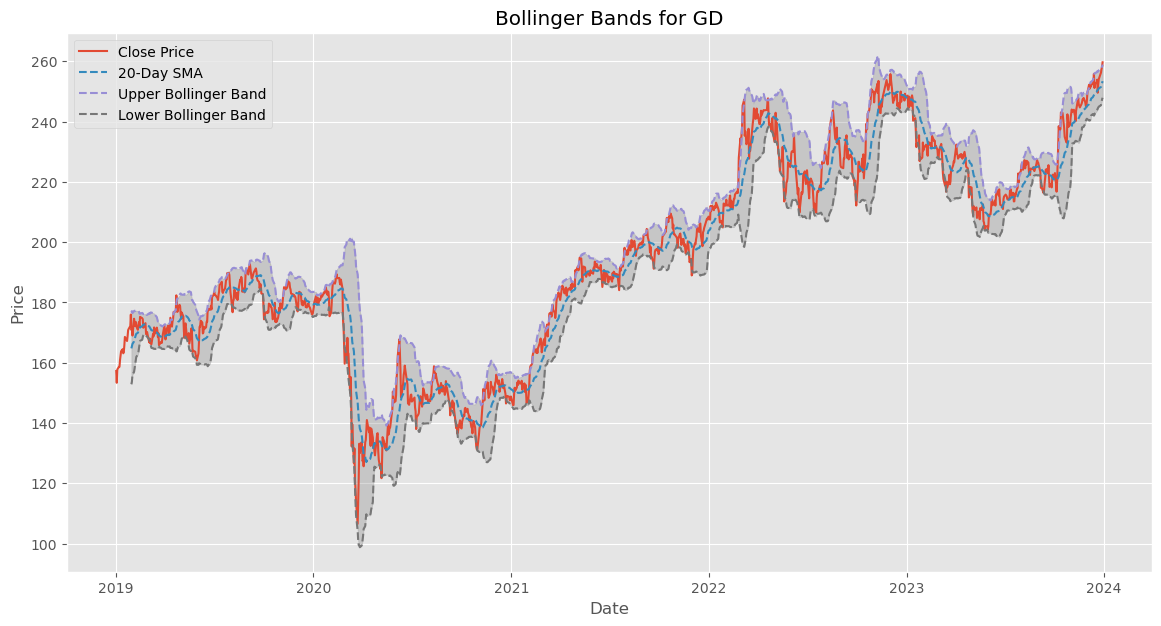

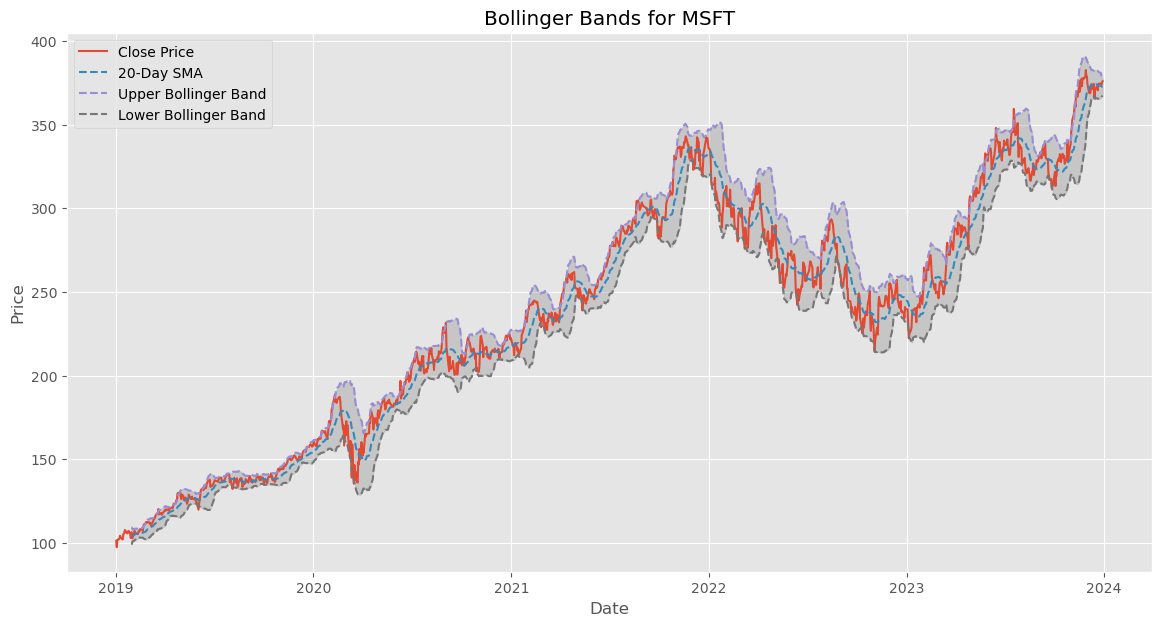

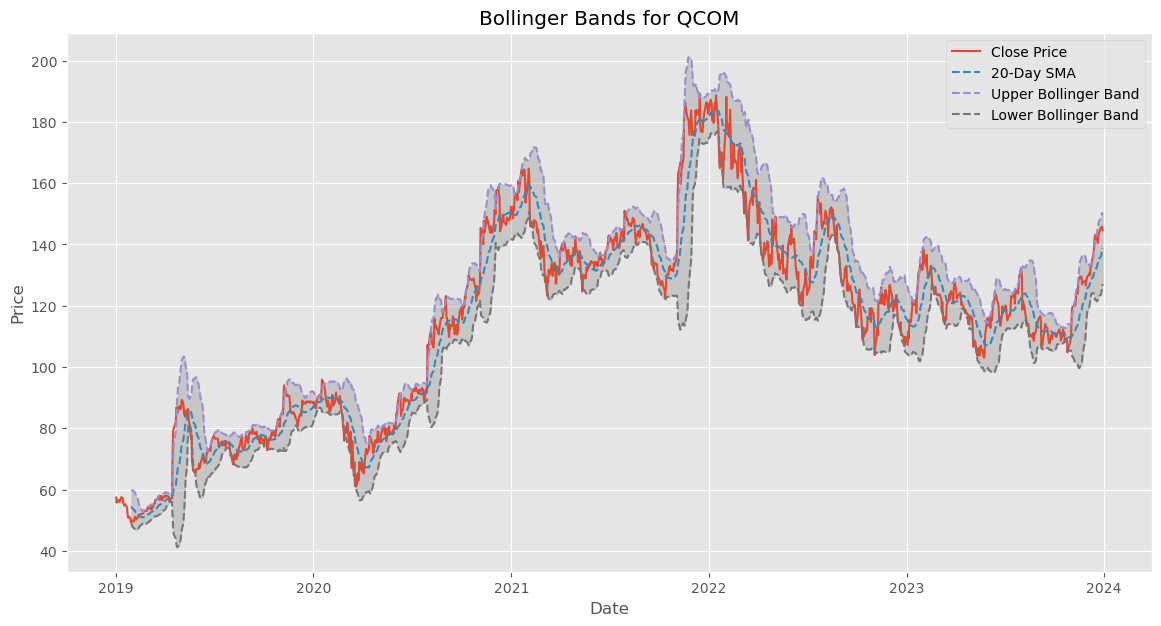

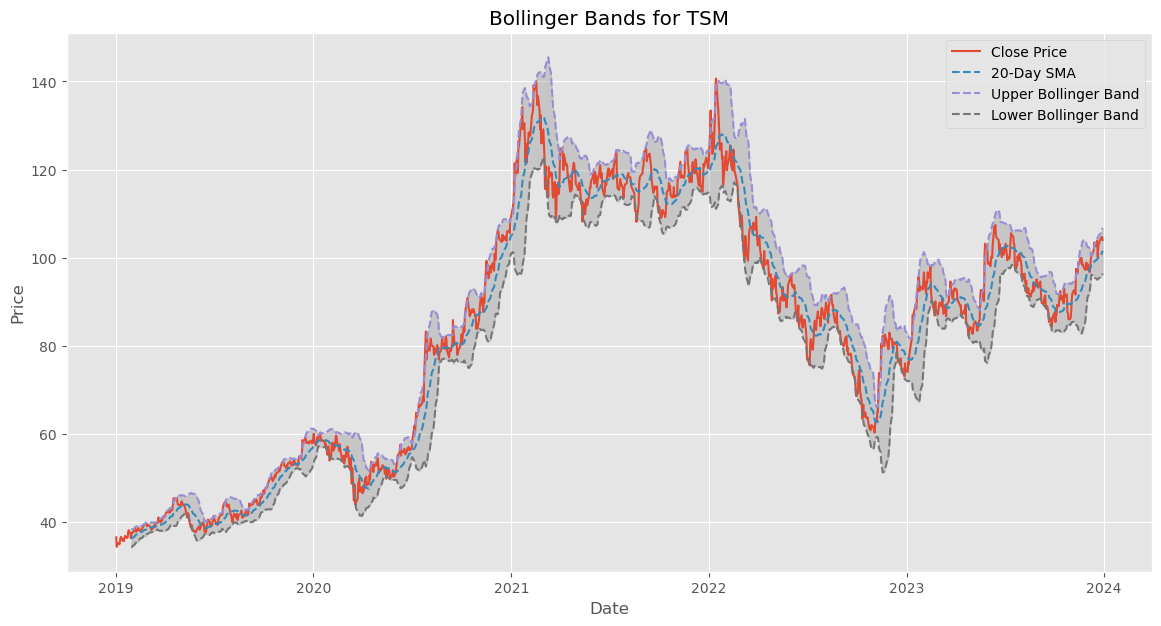

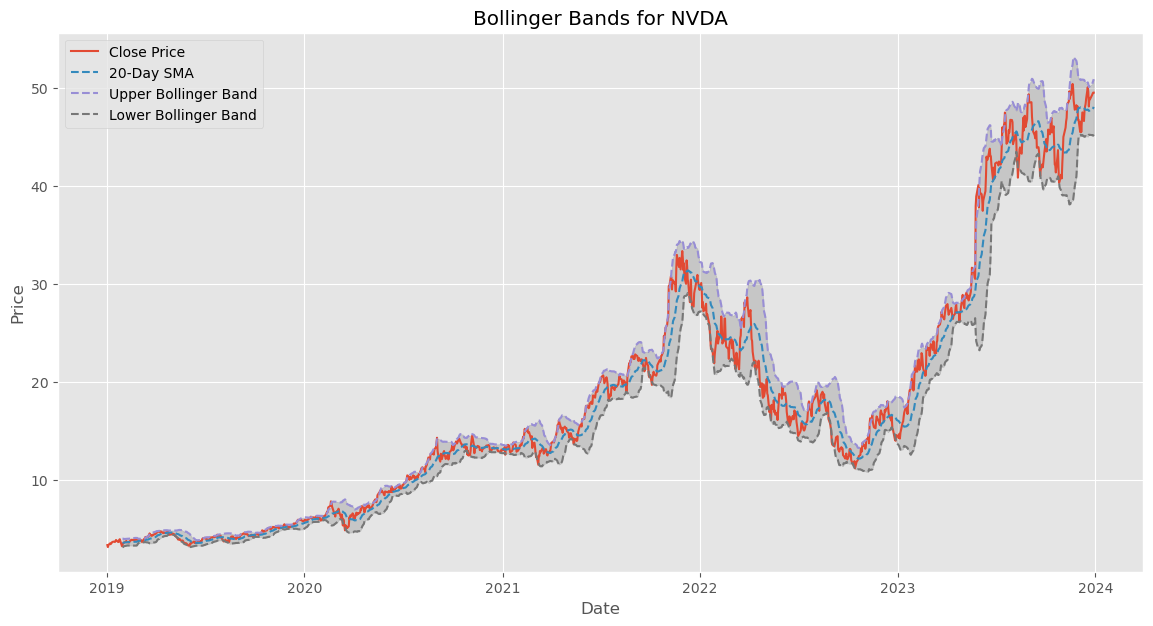

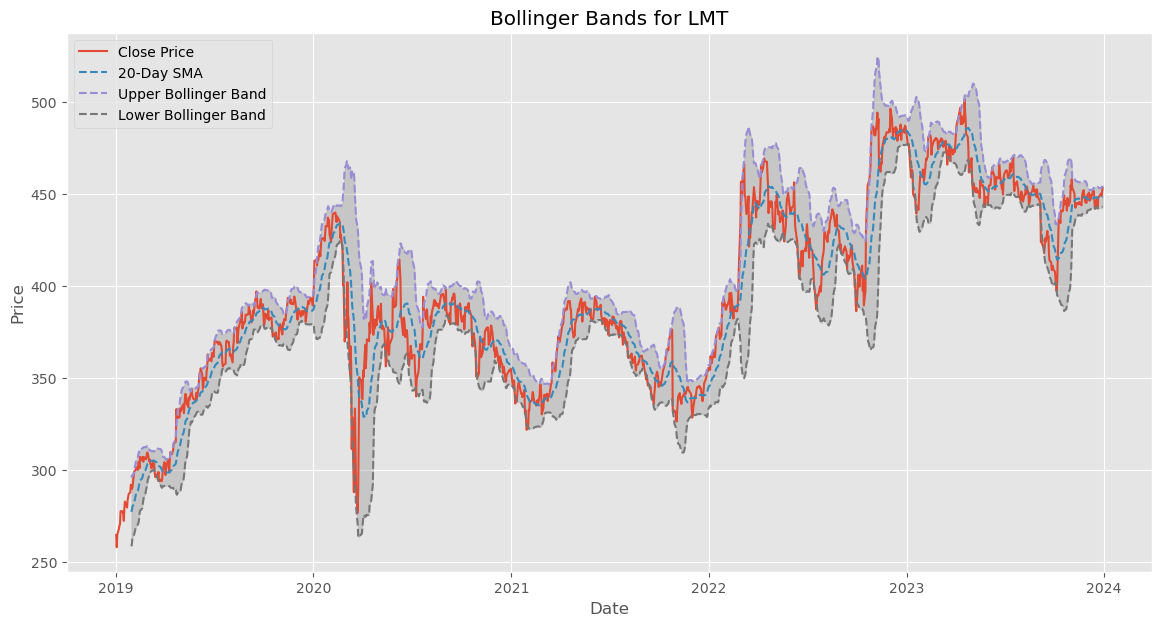

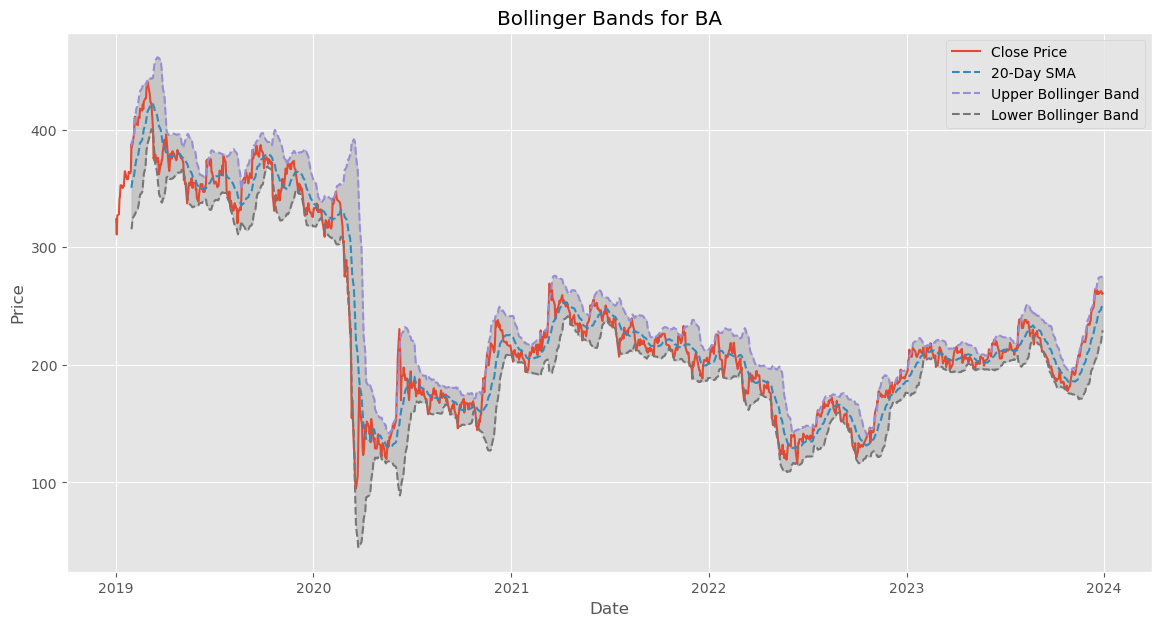

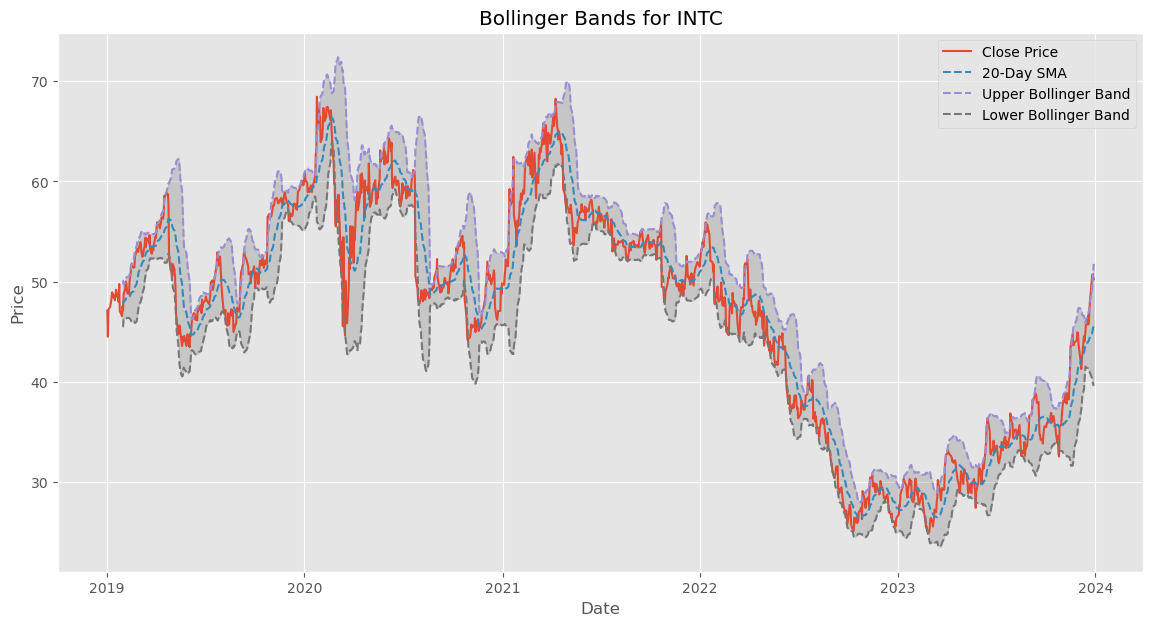

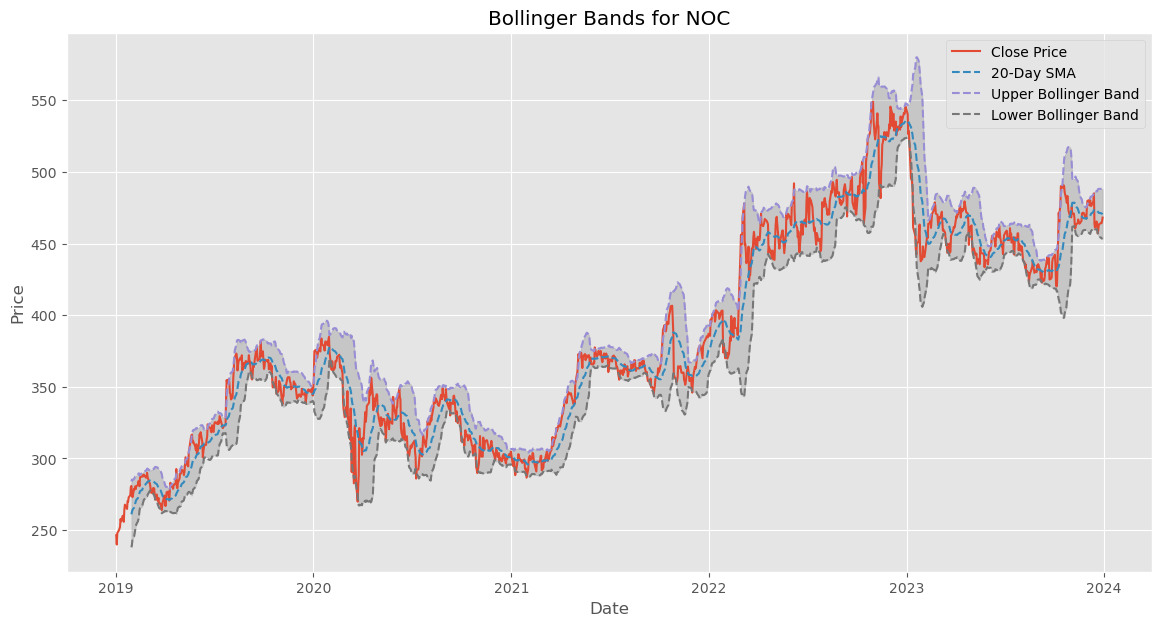

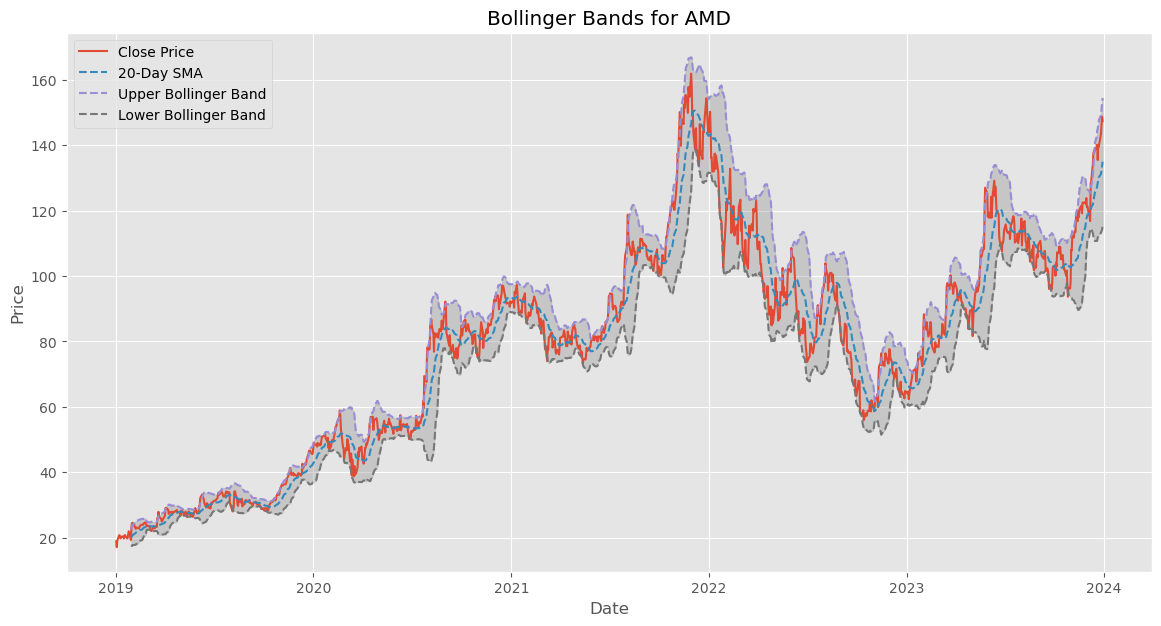

In [31]:
def plot_bollinger_bands(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df["Date"], df["Close"], label="Close Price")
    plt.plot(df["Date"], df["sma"], label="20-Day SMA", linestyle="--")
    plt.plot(df["Date"], df["BBhighband"], label="Upper Bollinger Band", linestyle="--")
    plt.plot(df["Date"], df["BBlowband"], label="Lower Bollinger Band", linestyle="--")
    plt.fill_between(df["Date"], df["BBlowband"], df["BBhighband"], color='gray', alpha=0.3)
    
    plt.title(f"Bollinger Bands for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(loc="best")
    plt.show()

for ticker in tickers:
    ticker_data = results[results["Ticker"] == ticker]
    plot_bollinger_bands(ticker_data, ticker)

## Creating a function to plot cumulative returns of bollinger bands mean reversion strategy vs cumulative returns of holding stocks over the same period 

### Display of market vs strategy returns per ticker

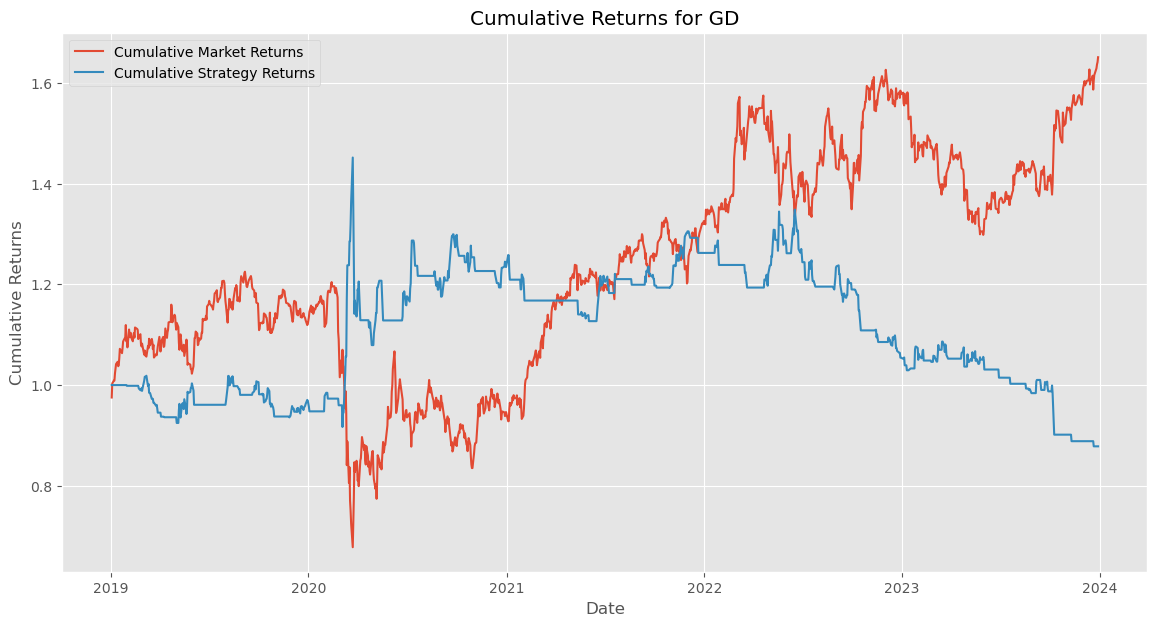

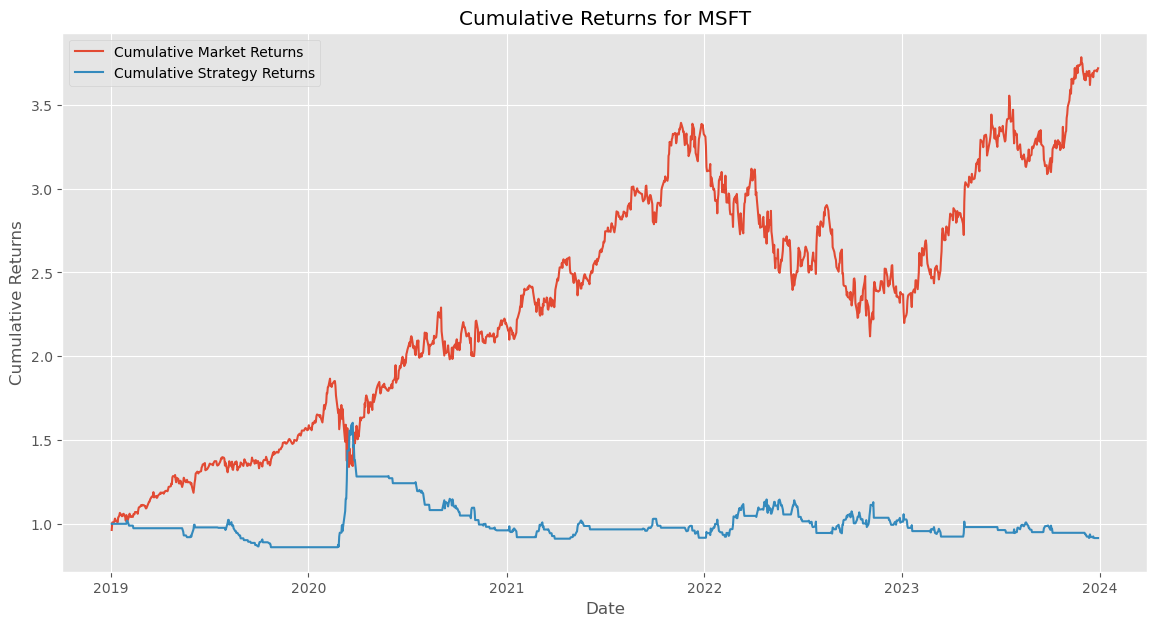

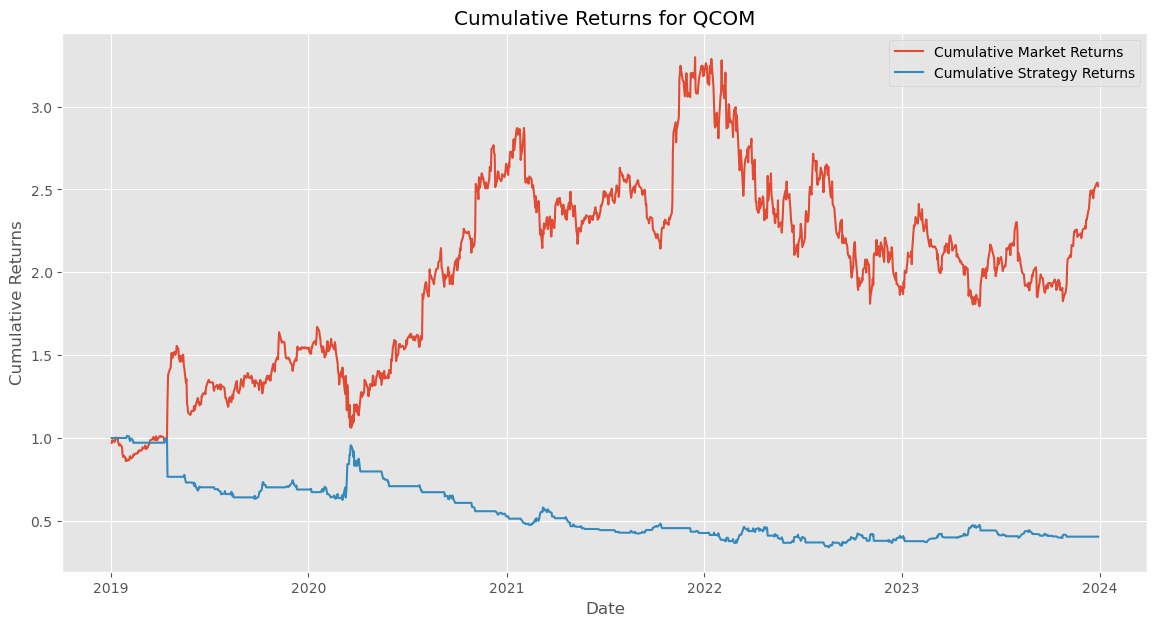

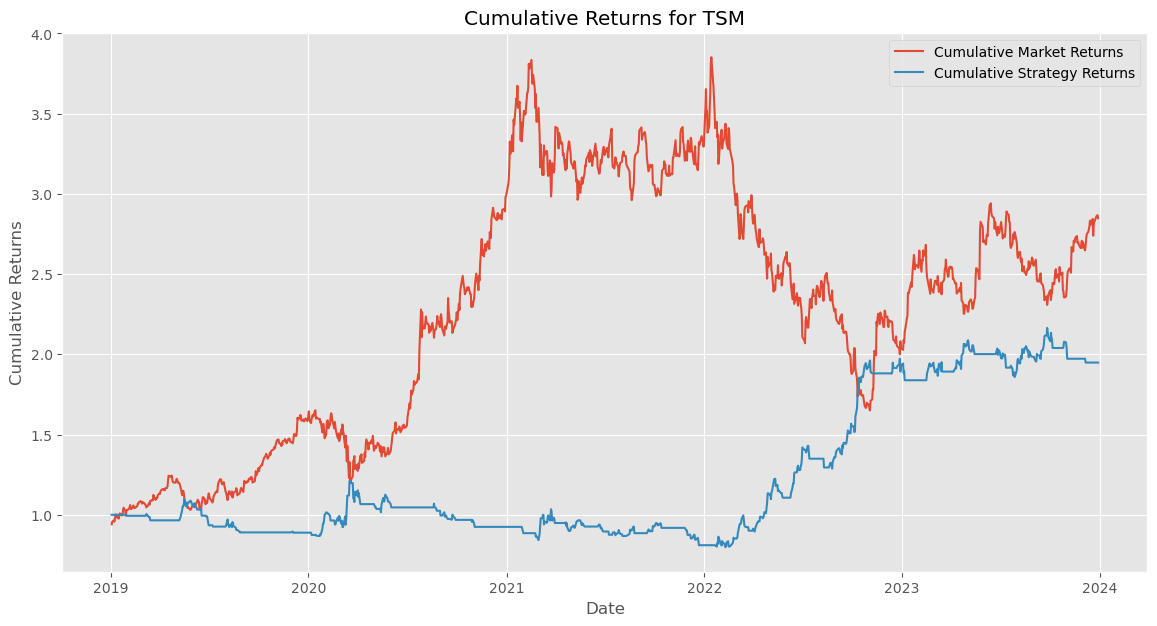

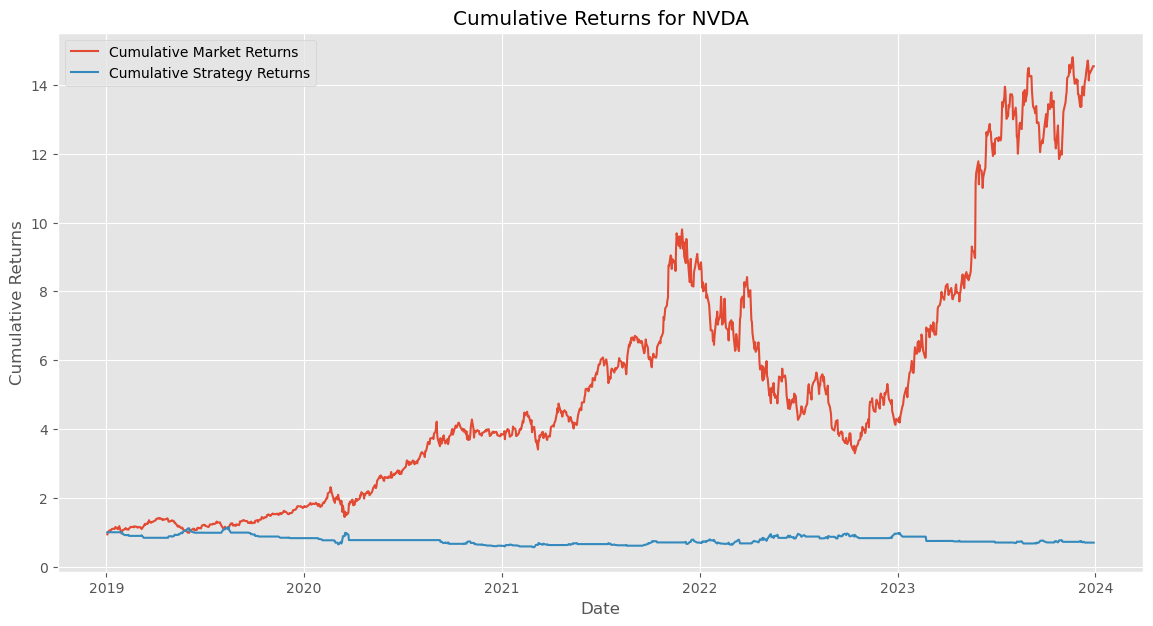

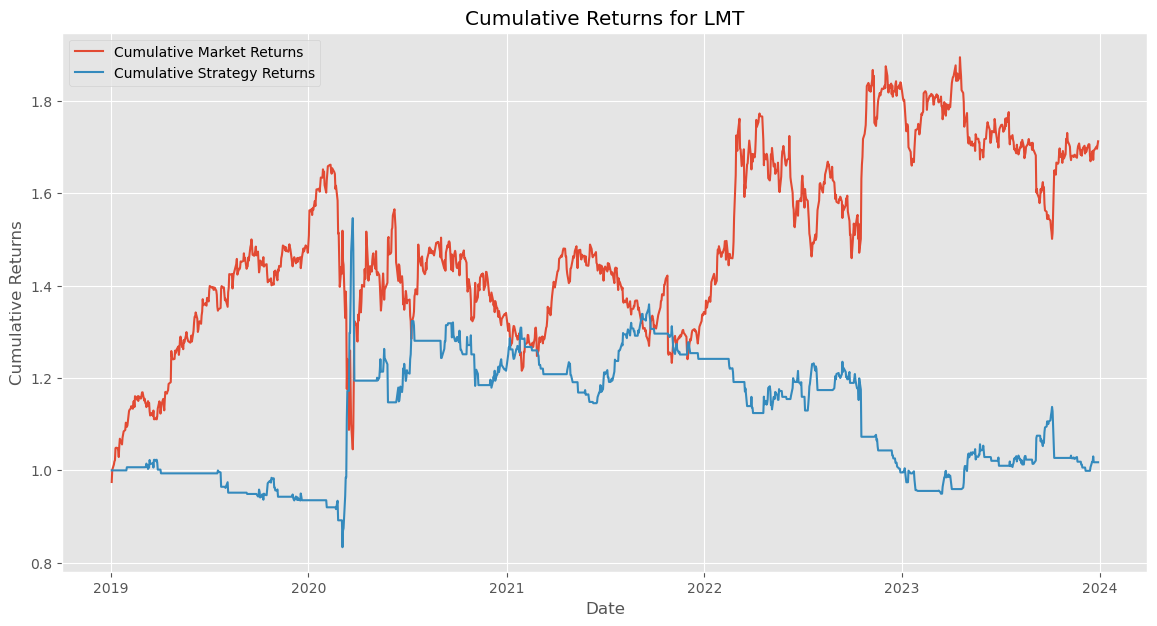

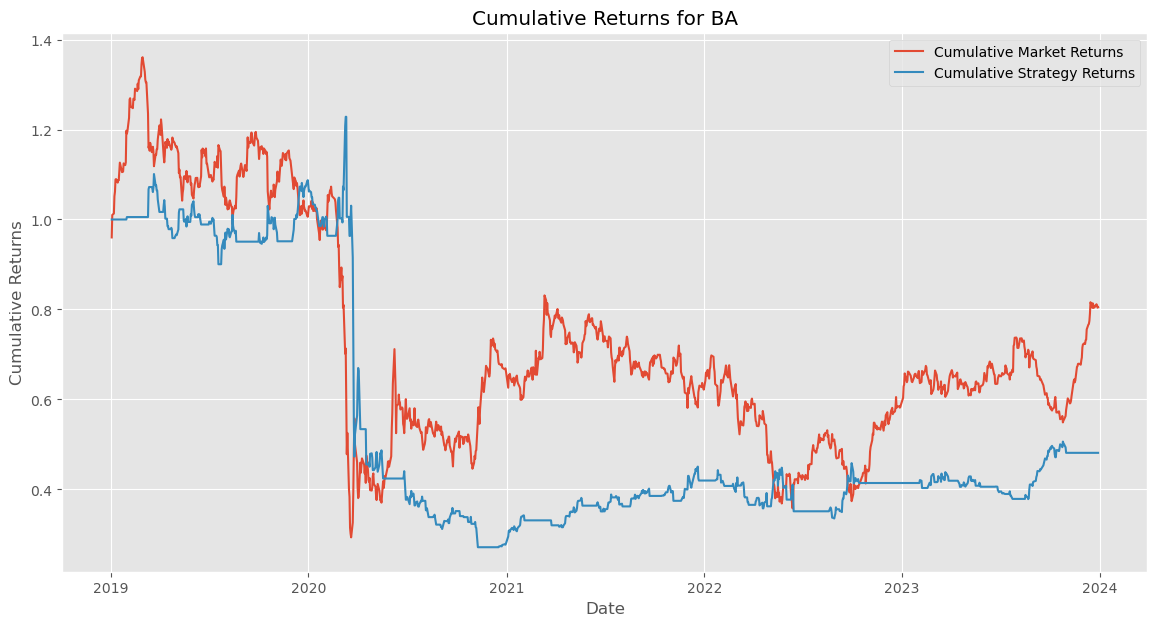

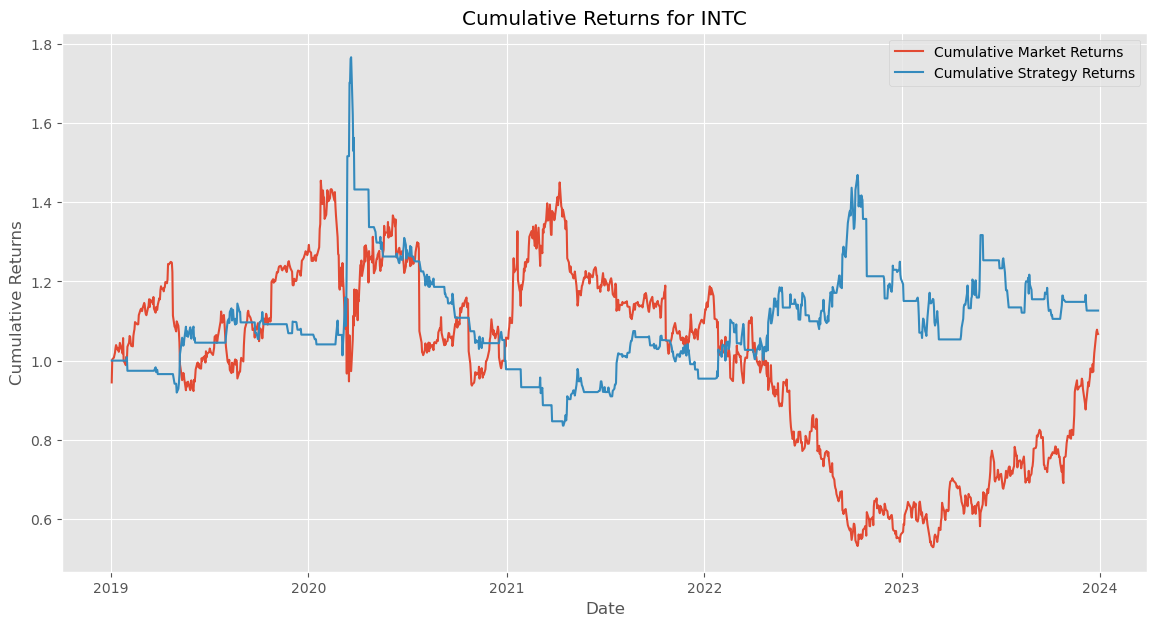

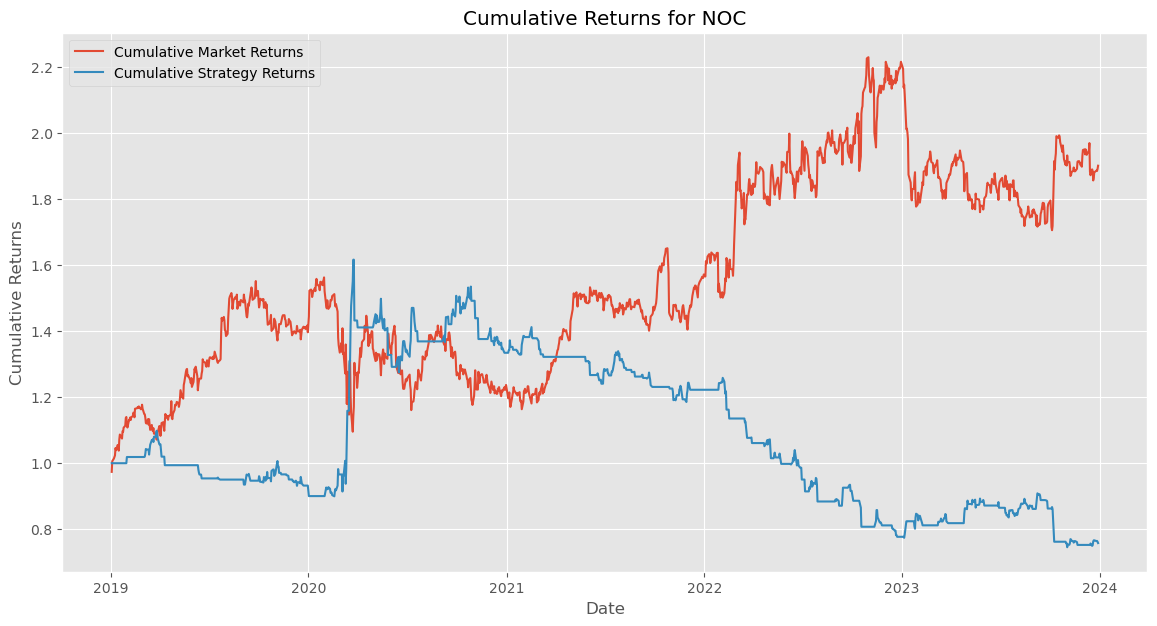

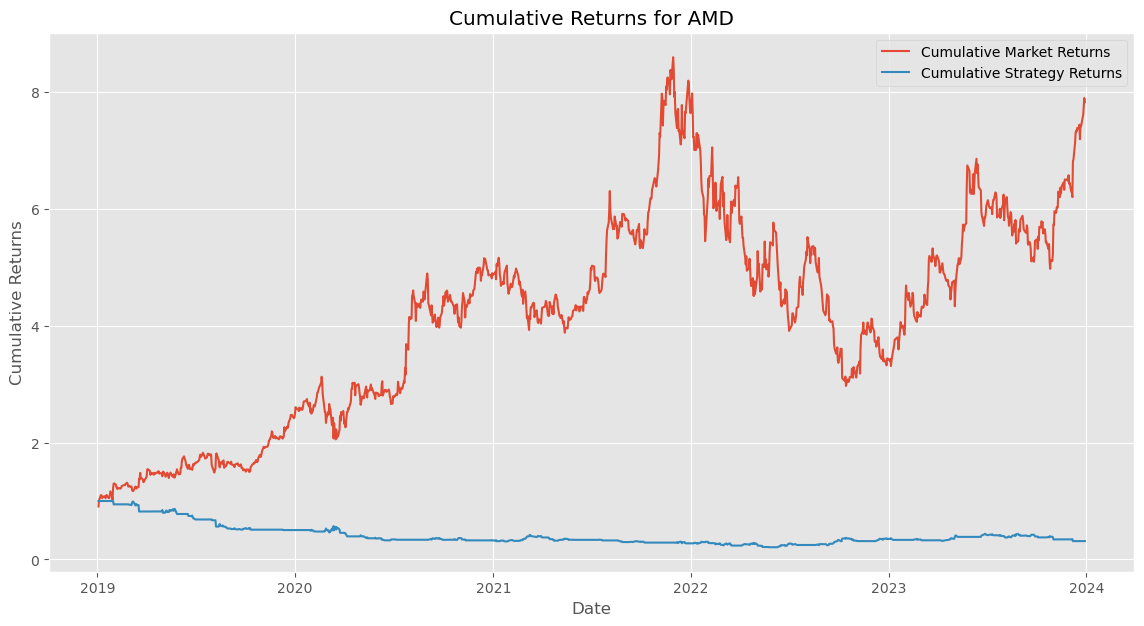

In [32]:
def plot_returns(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(df["Date"], df["cumulative_market_returns"], label="Cumulative Market Returns")
    plt.plot(df["Date"], df["cumulative_strategy_returns"], label="Cumulative Strategy Returns")
    
    plt.title(f"Cumulative Returns for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend(loc="best")
    plt.show()
    
for ticker in tickers:
    ticker_data = results[results["Ticker"] == ticker]
    plot_returns(ticker_data, ticker)


### Pivoting dataframe for subsequent portfolio operations 
### Assigning portfolio columns and weightings

In [33]:
multi_df_pivot = multi_df.pivot(index='Date', columns='Ticker', values='Close')
multi_df_pivot

portfolio_stocks = multi_df_pivot.columns[:10]
multi_df_pivot = multi_df_pivot[portfolio_stocks]

weights = np.ones(10) / 10

## Determining portfolio returns and daily volatility 
## Annualising returns and volatility

In [34]:
returns = np.log(multi_df_pivot).diff()
returns = returns.dropna()

portfolio_returns = np.dot(returns, weights)

daily_volatility = portfolio_returns.std()

#Number of Trading days in a year
trading_days = 252

annualised_return = portfolio_returns.mean() * trading_days
annualised_volatility = daily_volatility * np.sqrt(trading_days)

# Correlation Matrix of simple daily returns of all tickers

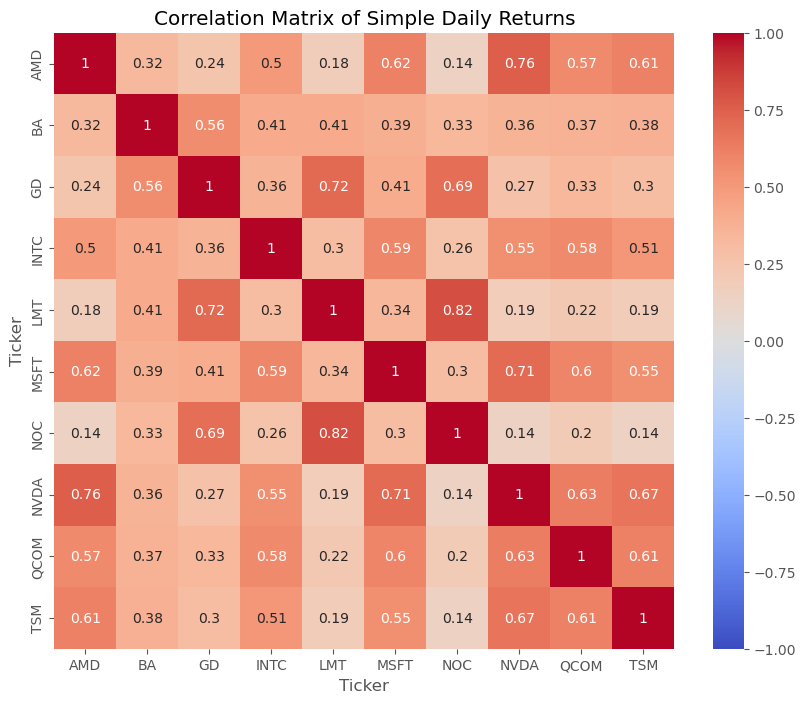

In [35]:
simple_returns = multi_df_pivot.pct_change().dropna()

correlation_matrix = simple_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Simple Daily Returns')
plt.show()

# Sharpe ratio of 1/N portfolio

In [36]:
#Risk free rate taken as UK 15 yr Gilt yield of 4.431% [arbitrary decision]
RFR = 0.0431

sharpe_ratio = (annualised_return - RFR) / annualised_volatility

sharpe_ratio

0.546139186436286

# Optimizing portfolio weights by minimizing negative Sharpe ratio

In [37]:
def negative_sharpe(weights):
    portfolio_returns = np.dot(returns, weights)
    annualised_returns = portfolio_returns.mean() * 252
    annualised_volatility = portfolio_returns.std() * np.sqrt(252)

    sharpe_ratio = (annualised_returns - RFR) / annualised_volatility
    
    #"-" operator to take inverse/negative of Sharpe Ratio
    return - sharpe_ratio

# Setting optimisation model constraints
### > Equality component of constraint to ensure sum of weights to 1
### > Weighting boundaries to bound individual weights from 0 to 1
### > Optimal weighting calculation for maximum Sharpe ratio

In [38]:
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

bounds = tuple((0, 1) for x in range(10))

init_weights = np.ones(10) / 10
optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
optimal_weights = optimal.x
optimal_weights

array([0.00000000e+00, 0.00000000e+00, 2.65530130e-16, 0.00000000e+00,
       1.46996011e-17, 1.66869603e-02, 2.42845471e-01, 7.40467569e-01,
       0.00000000e+00, 0.00000000e+00])

# Plotting returns of 1/N portfolio vs Sharpe ratio maximising portfolio 

In [39]:
#First obvs effectively dropped to prevent 'shapes'  mismatch error 
dates_axis = multi_df.Date.drop_duplicates()[1:]

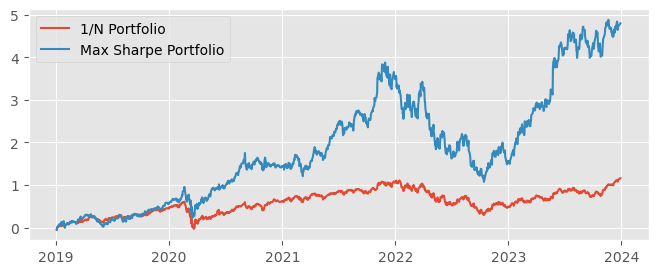

In [40]:
init_portfolio_returns = np.dot(returns, init_weights)
init_cumulative_returns = np.cumprod(1 + init_portfolio_returns) - 1
opt_portfolio_returns = np.dot(returns, optimal_weights)
opt_cumulative_returns = np.cumprod(1 + opt_portfolio_returns) - 1

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(dates_axis, init_cumulative_returns, label = "1/N Portfolio")
ax.plot(dates_axis, opt_cumulative_returns, label = "Max Sharpe Portfolio")
ax.legend()
plt.show()

# AI CODE - MINIMIZE VOLATILITY

In [41]:
### Annotations from combination of human prompt and AI explanation
### Only input to AI tool was PFF_IP/multi_df dataset, A2 Optimisation document, "explanatory steps requirement" prompt, "Minimize Volatility" prompt, "Maximize Sortino Ratio" prompt
### Visualisations plotted by "hand" [so to speak]
## Thus far AI only used for minor error resolutions; the following code is the only AI-exclusive output in this work and the prompts have been provided above
## *The AI model used is GPT Python by Nicholas Barker in Chat GPT 4o by OpenAI* 

# Pivot the DataFrame to get a matrix of adjusted close prices
price_df = multi_df.pivot(index="Date", columns="Ticker", values="Adj Close")

# Calculate daily returns
returns_df = price_df.pct_change().dropna()

# Number of assets
num_assets = returns_df.shape[1]

# Step 3: Minimizing Volatility
# Calculate the covariance matrix of returns
cov_matrix = returns_df.cov()

# Objective function: minimize portfolio volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Constraints: the sum of the weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: weights are between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess: equally distributed weights
initial_guess = num_assets * [1. / num_assets]

# Minimize the portfolio volatility
result_volatility = minimize(portfolio_volatility, initial_guess, args=(cov_matrix,),
                             method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for minimizing volatility
optimal_weights_volatility = result_volatility.x

print("Optimal Weights for Minimizing Volatility:")
print(optimal_weights_volatility)

Optimal Weights for Minimizing Volatility:
[2.74283865e-18 0.00000000e+00 2.31491591e-01 1.47778975e-03
 2.25196793e-01 1.75061469e-01 1.84496423e-01 6.04822800e-19
 6.03253605e-18 1.82275935e-01]


In [42]:
# Calculate the daily returns
vol_portfolio_daily_returns = returns_df.dot(optimal_weights_volatility)

# Calculate the cumulative daily returns
vol_cumulative_daily_returns = (1 + vol_portfolio_daily_returns).cumprod()

# Calculate the overall cumulative return
vol_overall_cumulative_return = vol_cumulative_daily_returns.iloc[-1] - 1

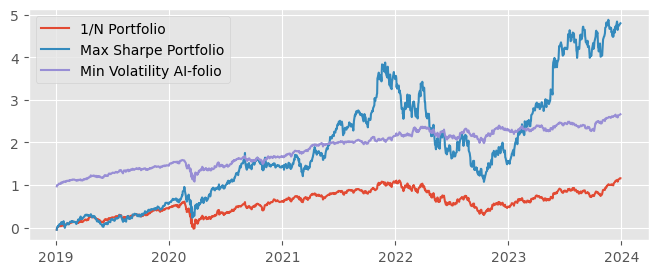

In [43]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(dates_axis, init_cumulative_returns, label = "1/N Portfolio")

ax.plot(dates_axis, opt_cumulative_returns, label = "Max Sharpe Portfolio")

ax.plot(dates_axis, vol_cumulative_daily_returns, label = "Min Volatility AI-folio")

ax.legend()
plt.show()

# AI CODE CONTINUED - MAXIMIZE SORTINO RATIO

In [44]:
# Step 1: Load the data
multi_df = pd.read_csv("PFF_IP_stock_data.csv")

# Step 2: Calculate daily returns
# Pivot the DataFrame to get a matrix of adjusted close prices
price_df = multi_df.pivot(index="Date", columns="Ticker", values="Adj Close")

# Calculate daily returns
returns_df = price_df.pct_change().dropna()

# Number of assets
num_assets = returns_df.shape[1]

# Step 3: Maximizing Sortino Ratio
# Calculate portfolio return
def portfolio_return(weights, returns):
    return np.dot(returns, weights)

# Calculate the Sortino Ratio
def sortino_ratio(weights, historical_returns, risk_free_rate=0.0):
    portfolio_returns = np.dot(historical_returns, weights)
    mean_return = np.mean(portfolio_returns)
    downside_deviation = np.sqrt(np.mean(np.minimum(0, portfolio_returns - mean_return)**2))
    sortino = (mean_return - risk_free_rate) / downside_deviation
    return -sortino  # Negative because we want to maximize the Sortino Ratio

# Constraints: the sum of the weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: weights are between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess: equally distributed weights
initial_guess = num_assets * [1. / num_assets]

# Maximize the Sortino Ratio
result_sortino = minimize(sortino_ratio, initial_guess, args=(returns_df.values,),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for maximizing Sortino Ratio
optimal_weights_sortino = result_sortino.x

print("Optimal Weights for Maximizing Sortino Ratio:")
print(optimal_weights_sortino)

# Step 4: Calculate Portfolio Returns
# Calculate the portfolio daily returns
portfolio_daily_returns_sortino = returns_df.dot(optimal_weights_sortino)

# Calculate the cumulative daily returns
cumulative_daily_returns_sortino = (1 + portfolio_daily_returns_sortino).cumprod()

# Calculate the overall cumulative return
overall_cumulative_return_sortino = cumulative_daily_returns_sortino.iloc[-1] - 1

print("Simple Daily Returns (Sortino Ratio):")
print(portfolio_daily_returns_sortino)

print("Cumulative Daily Returns (Sortino Ratio):")
print(cumulative_daily_returns_sortino)

print("Overall Cumulative Return (Sortino Ratio):")
print(overall_cumulative_return_sortino)

Optimal Weights for Maximizing Sortino Ratio:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.02186766e-17
 0.00000000e+00 2.09983500e-17 4.08127181e-01 5.91872819e-01
 0.00000000e+00 1.60203996e-17]
Simple Daily Returns (Sortino Ratio):
Date
2019-01-03   -0.046444
2019-01-04    0.051495
2019-01-07    0.034512
2019-01-08   -0.012889
2019-01-09    0.013575
                ...   
2023-12-22    0.001542
2023-12-26    0.006650
2023-12-27    0.001411
2023-12-28    0.002541
2023-12-29    0.002156
Length: 1257, dtype: float64
Cumulative Daily Returns (Sortino Ratio):
Date
2019-01-03    0.953556
2019-01-04    1.002659
2019-01-07    1.037262
2019-01-08    1.023893
2019-01-09    1.037793
                ...   
2023-12-22    7.791518
2023-12-26    7.843329
2023-12-27    7.854399
2023-12-28    7.874359
2023-12-29    7.891336
Length: 1257, dtype: float64
Overall Cumulative Return (Sortino Ratio):
6.891335809576471


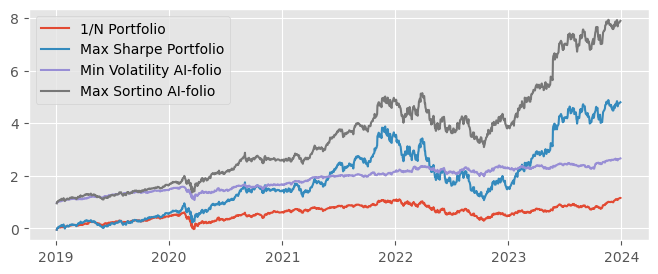

In [45]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(dates_axis, init_cumulative_returns, label = "1/N Portfolio")

ax.plot(dates_axis, opt_cumulative_returns, label = "Max Sharpe Portfolio")

ax.plot(dates_axis, vol_cumulative_daily_returns, label = "Min Volatility AI-folio")

ax.plot(dates_axis, cumulative_daily_returns_sortino, label = "Max Sortino AI-folio")

ax.legend()
plt.show()

# Report and Recommendation

The portfolio optimisation which I would recommend implement is the one that performed the best out of all discussed weighting arrangements with the given tickers: Chat GPT-4o’s model which maximised the Sortino ratio, which interestingly produced the same return profile as the model which maximised the Sharpe ratio at a higher multiple. This similarity was also the case between the AI model which minimized volatility as a portfolio weighting strategy and the 1/N portfolio weighting strategy, both having mirror return profiles at different multiples. The optimal weightings for the AI optimized Sortino ratio maximizing model are as calculated by AI:

[3.39361595e-17, 3.34129495e-17, 0.00000000e+00, 4.99715803e-17,
 8.68175356e-18, 0.00000000e+00, 4.08127211e-01, 5.91872789e-01,
 0.00000000e+00, 9.15189723e-19]

There is only one plausible stock to use the Bollinger bands mean reversion strategy for, and that is the BA ticker for the Boeing company for which the means reversion strategy was  substantially more profitable in comparison to holding the stock, but this was the only ticker for which this was the case. It seems that in 9/10 cases the Bollinger bands mean reversion strategy is a worse strategy than simply buying and holding the equity, indicating it is generally a bad strategy which is generally not to be recommended for implementation, and would not be suitable for any other stocks in the portfolio.

The integration of the code outputted by Chat-GPT 4o was simple and almost out-of-the-box ready, with a few unnecessary print constructions that I addressed by coding visualisations for instead but largely very easy to integrate, even in parts using similar syntax as that of the PFF course material. The syntax of the AI output was clear, and the steps describing each line of code greatly enhanced understanding of the code being used and its applications. Chat-GPT 4o is incredibly impressive when it comes to python outputs, and was also greatly helpful for me to understand errors throughout the PFF course and this individual project.

Given that the return of the Sortino ratio maximizing portfolio has generated more than 8x greater returns than the 1/N equal weighting portfolio, it is clear that in comparison to a simple even distribution of stocks in a portfolio, the Sortino ratio maximising portfolio is greatly more profitable and hence I would recommend the firm invest in this portfolio. Minimising volatility is not an effective strategy, as maximizing both the Sharpe and Sortino ratios lead to much greater returns, leading to a clear case for the recommendation to the firm of investing in a Sortino maximised portfolio.
